In [384]:
#data imports 
import pandas as pd
import numpy as np

#viz imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance
import imblearn.over_sampling

### EDA

In [113]:
fraud_df = pd.read_csv('data/fraud_data.csv', index_col = 0)

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [114]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [115]:
fraud_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [116]:
fraud_df.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

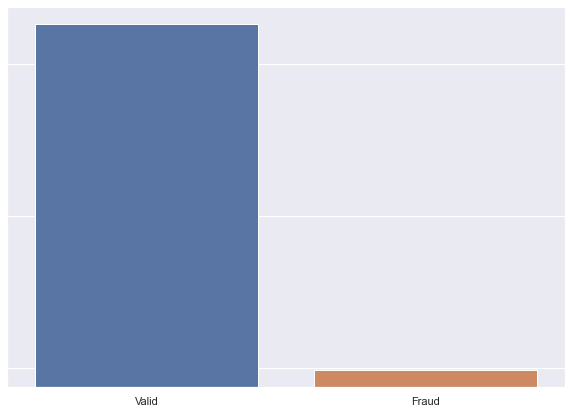

<Figure size 432x288 with 0 Axes>

In [381]:
plt.figure(figsize=[10,7]);
g = sns.countplot(x = fraud_df.is_fraud);
g.set_xticklabels(['Valid', 'Fraud']);
g.set_yscale("log");
g.set_yticklabels([]);
g.set_xlabel('');
g.set_ylabel('');
plt.show();
plt.savefig('class_imbalance.png', dpi=500);

In [118]:
fraud_df.shape

(1852394, 22)

In [119]:
fraud_df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [120]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [121]:
fraud_df.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [122]:
fraud_df.groupby(['gender'])['amt'].sum()

gender
F    70988318.38
M    58797013.63
Name: amt, dtype: float64

In [123]:
fraud_df.groupby('gender')['is_fraud'].value_counts()

gender  is_fraud
F       0           1009850
        1              4899
M       0            832893
        1              4752
Name: is_fraud, dtype: int64

In [124]:
fraud_df.groupby(['gender','is_fraud'])['amt'].sum()

gender  is_fraud
F       0           68585571.80
        1            2402746.58
M       0           56078346.92
        1            2718666.71
Name: amt, dtype: float64

In [125]:
#convert gender to numeric
gender_dict = {'M': 1,'F': 2}
fraud_df.gender = [gender_dict[item] for item in fraud_df.gender]

In [126]:
#convert transaction datetime to actual datetime column
fraud_df.trans_date_trans_time = pd.to_datetime(fraud_df.trans_date_trans_time)

In [127]:
fraud_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,2,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,2,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [128]:
fraud_df.dob = pd.to_datetime(fraud_df.dob)

In [130]:
#add age
fraud_df['age'] = ((fraud_df.trans_date_trans_time - fraud_df.dob)/np.timedelta64(1, 'Y')).round()

In [131]:
fraud_df['tran_day_of_week'] = fraud_df.trans_date_trans_time.dt.weekday

In [132]:
fraud_df['tran_day_of_month'] = fraud_df.trans_date_trans_time.dt.day

In [133]:
fraud_df['tran_month_of_year'] = fraud_df.trans_date_trans_time.dt.month

In [134]:
fraud_df['tran_hour_of_day'] = fraud_df.trans_date_trans_time.dt.hour

In [135]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,tran_day_of_week,tran_day_of_month,tran_month_of_year,tran_hour_of_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,2,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31.0,1,1,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,2,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41.0,1,1,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57.0,1,1,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52.0,1,1,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33.0,1,1,1,0


In [136]:
fraud_df.category.value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [137]:
fraud_df.groupby('category')['is_fraud'].value_counts()

category        is_fraud
entertainment   0           133826
                1              292
food_dining     0           130524
                1              205
gas_transport   0           187257
                1              772
grocery_net     0            64703
                1              175
grocery_pos     0           173963
                1             2228
health_fitness  0           122368
                1              185
home            0           175195
                1              265
kids_pets       0           161423
                1              304
misc_net        0            89472
                1             1182
misc_pos        0           113907
                1              322
personal_care   0           129795
                1              290
shopping_net    0           137103
                1             2219
shopping_pos    0           165407
                1             1056
travel          0            57800
                1             

In [138]:
fraud_df.groupby(['category','is_fraud'])['amt'].sum()

category        is_fraud
entertainment   0            8455326.62
                1             147399.96
food_dining     0            6641668.36
                1              24739.16
gas_transport   0           11926125.32
                1               9442.53
grocery_net     0            3481095.84
                1               2108.21
grocery_pos     0           19855279.35
                1             695664.62
health_fitness  0            6624890.85
                1               3751.36
home            0           10141466.04
                1              68231.96
kids_pets       0            9298187.22
                1               5619.53
misc_net        0            6324752.23
                1             944009.71
misc_pos        0            7090976.63
                1              68494.84
personal_care   0            6242738.57
                1               7571.96
shopping_net    0            9898082.03
                1            2214847.64
shopping_pos   

In [139]:
#convert category to dummies
category_dummies = pd.get_dummies(fraud_df.category, prefix = 'cat', drop_first = True)
fraud_df1 = pd.concat([fraud_df, category_dummies], axis = 1)

In [141]:
category_dummies

,cat_food_dining,cat_gas_transport,cat_grocery_net,cat_grocery_pos,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,0,0,0,0,0,0,0,0,0,0,0,0,1


In [142]:
fraud_df1

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,cat_grocery_pos,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,2,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,2,43039 Riley Greens Suite 393,Orient,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,1,558 Michael Estates,Luray,...,0,1,0,0,0,0,0,0,0,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,1,572 Davis Mountains,Lake Jackson,...,0,0,0,1,0,0,0,0,0,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,2,144 Evans Islands Apt. 683,Burbank,...,0,0,0,1,0,0,0,0,0,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,Mesa,...,0,0,0,0,0,0,0,0,0,1


### Modeling

In [143]:
X = fraud_df1[['amt', 'gender', 'city_pop', 'age', 'tran_day_of_week', 'tran_day_of_month', 'tran_month_of_year',
            'tran_hour_of_day', 'cat_food_dining', 'cat_gas_transport', 'cat_grocery_net', 'cat_grocery_pos',
            'cat_health_fitness', 'cat_home', 'cat_kids_pets', 'cat_misc_net', 'cat_misc_pos', 'cat_personal_care',
            'cat_shopping_net', 'cat_shopping_pos', 'cat_travel']]

In [144]:
y = fraud_df1.is_fraud

In [145]:
X

,amt,gender,city_pop,age,tran_day_of_week,tran_day_of_month,tran_month_of_year,tran_hour_of_day,cat_food_dining,cat_gas_transport,...,cat_grocery_pos,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel
0,4.97,2,3495,31.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,2,149,41.0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,57.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,52.0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,33.0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,519,55.0,3,31,12,23,0,0,...,0,1,0,0,0,0,0,0,0,0
555715,111.84,1,28739,21.0,3,31,12,23,0,0,...,0,0,0,1,0,0,0,0,0,0
555716,86.88,2,3684,39.0,3,31,12,23,0,0,...,0,0,0,1,0,0,0,0,0,0
555717,7.99,1,129,55.0,3,31,12,23,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 1852394, dtype: int64

### Train Val Test split (stratified)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.2, random_state=42)

In [164]:
y_train.value_counts()

0    1474194
1       7721
Name: is_fraud, dtype: int64

In [165]:
y_test.value_counts()

0    368549
1      1930
Name: is_fraud, dtype: int64

In [166]:
X_train.shape

(1481915, 21)

In [167]:
y_train.shape

(1481915,)

In [168]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size=0.25, random_state=42)

In [169]:
X_train.shape

(1111436, 21)

In [170]:
y_train.shape

(1111436,)

In [171]:
X_val.shape

(370479, 21)

In [172]:
y_val.shape

(370479,)

In [173]:
X_test.shape

(370479, 21)

In [174]:
y_test.shape

(370479,)

In [175]:
y_train.value_counts()

0    1105645
1       5791
Name: is_fraud, dtype: int64

In [176]:
y_val.value_counts()

0    368549
1      1930
Name: is_fraud, dtype: int64

In [177]:
y_test.value_counts()

0    368549
1      1930
Name: is_fraud, dtype: int64

### Correcting Class Imbalance using SMOTE

In [ ]:
#selecting the best ratio for SMOTE (this run for around 25 mins)

scores = []
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

for i in range(2,101):
    ratio = {1 : n_pos * i, 0 : n_neg} 
    smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    lr_smote = LogisticRegression(max_iter = 1000)
    lr_smote.fit(X_train_smote, y_train_smote)
    scores.append([i, f1_score(y_val, lr_smote.predict(X_val)), roc_auc_score(y_val, lr_smote.predict_proba(X_val)[:,1])])

In [314]:
for i in scores:
    print(i)

[2, 0.051834130781499205, 0.7464173822008636]
[3, 0.1347184986595174, 0.7868799948803569]
[4, 0.19656601539372406, 0.8029206442511978]
[5, 0.23838926174496644, 0.7670124459656288]
[6, 0.26006501625406353, 0.8157560505765524]
[7, 0.2772695285010556, 0.819058183881652]
[8, 0.27699632114260986, 0.7859298157596244]
[9, 0.29820485744456177, 0.8234574751676006]
[10, 0.30544865302815477, 0.8250271176179678]
[11, 0.31259780907668233, 0.8263830160898311]
[12, 0.3120728929384966, 0.827551220085793]
[13, 0.2846299810246679, 0.7987711773817042]
[14, 0.33241201400405385, 0.8358573969052168]
[15, 0.28177243953903586, 0.8018930518965448]
[16, 0.33031674208144796, 0.8367892321374523]
[17, 0.3110522832561218, 0.8314824385455483]
[18, 0.27706146926536734, 0.8056774095898862]
[19, 0.30649762282091914, 0.8326483945435255]
[20, 0.2718781434114097, 0.8077809241470509]
[21, 0.30446034404018874, 0.8335367572343677]
[22, 0.3027399311274143, 0.8339143520078327]
[23, 0.26693877551020406, 0.8105357803042115]
[24,

In [315]:
# simple lr
lr = LogisticRegression(max_iter = 1000) 
lr.fit(X_train, y_train)

print('Simple Logistic Regression; Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, lr.predict(X_val)), roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])))

Simple Logistic Regression; Val F1: 0.000, Val AUC: 0.589


In [319]:
# setup for the ratio argument of SMOTE initialization (1:14 is selected as it provides best scores)
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 14, 0 : n_neg} 

In [320]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# smote lr
lr_smote = LogisticRegression(max_iter = 1000)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [321]:
print('Logistic Regression on SMOTE Train Data; Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, lr_smote.predict(X_val)), roc_auc_score(y_val, lr_smote.predict_proba(X_val)[:,1])))

Logistic Regression on SMOTE Train Data; Val F1: 0.332, Val AUC: 0.836


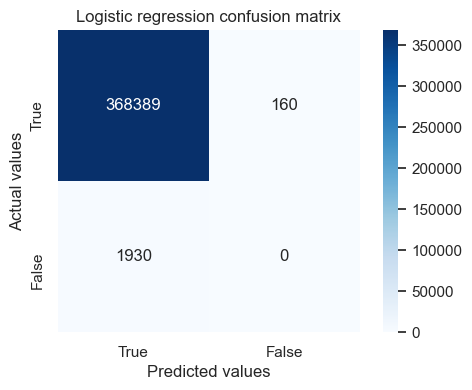

In [322]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(y_val, lr.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['True', 'False'],
           yticklabels=['True', 'False'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Logistic regression confusion matrix');

#plt.savefig("confusion_matrix_logreg")

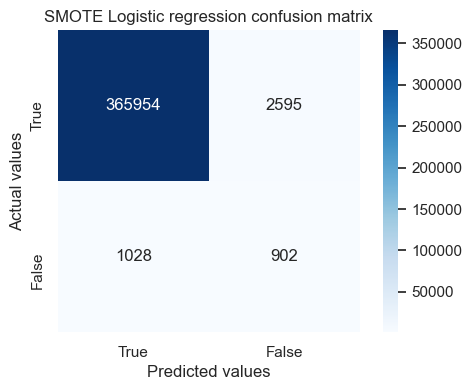

In [351]:
# Print confusion matrix for SMOTE logistic regression
logit_confusion = confusion_matrix(y_val, lr_smote.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['True', 'False'],
           yticklabels=['True', 'False'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('SMOTE Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logreg")

In [324]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [325]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

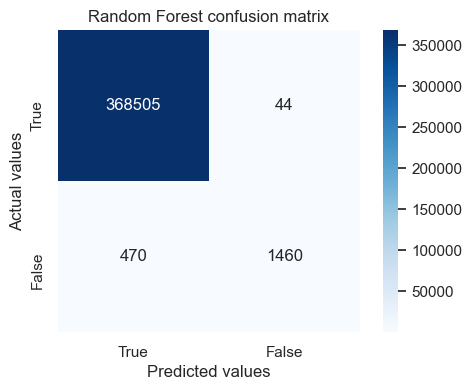

In [326]:
# Print confusion matrix for random forest
logit_confusion = confusion_matrix(y_val, rf.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['True', 'False'],
           yticklabels=['True', 'False'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest confusion matrix');

plt.savefig("confusion_matrix_rf")

In [327]:
# Random Forest SMOTE
rf_smote = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [328]:
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1)

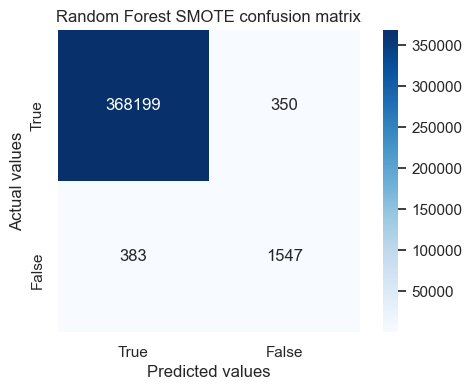

In [352]:
# Print confusion matrix for random forest
logit_confusion = confusion_matrix(y_val, rf_smote.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['True', 'False'],
           yticklabels=['True', 'False'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest SMOTE confusion matrix');

plt.savefig("confusion_matrix_rf_smote")

In [337]:
#XGBoost
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic',
                        learning_rate=.05, 
                        subsample=.7,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9988366412131322

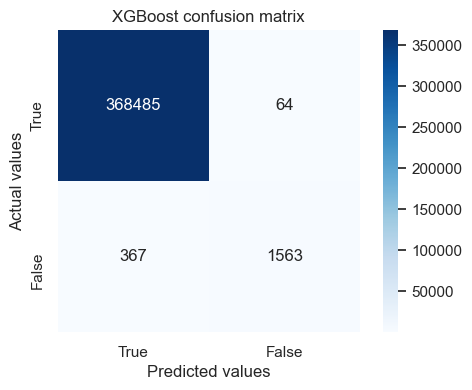

In [380]:
# Print confusion matrix for XGBoost
logit_confusion = confusion_matrix(y_test, gbm.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['True', 'False'],
           yticklabels=['True', 'False'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('XGBoost confusion matrix');

plt.savefig("confusion_matrix_XGBoost")

In [341]:
#XGBoost SMOTE
gbm_smote = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic',
                        learning_rate=.05, 
                        subsample=.7,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train_smote,y_train_smote),(X_val,y_val)]
fit_model = gbm_smote.fit( 
                    X_train_smote, y_train_smote, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm_smote.predict(X_test, ntree_limit=gbm_smote.best_ntree_limit)) 

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9961671241824773

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


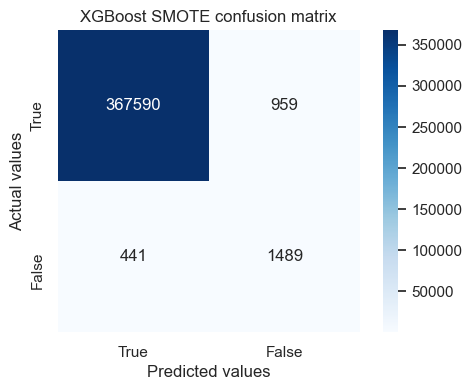

In [343]:
# Print confusion matrix for XGBoost SMOTE
logit_confusion = confusion_matrix(y_val, gbm_smote.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['True', 'False'],
           yticklabels=['True', 'False'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('XGBoost SMOTE confusion matrix');

plt.savefig("confusion_matrix_XGBoost_smote")

### Plot 3 best models

ROC AUC score for Logistic Regression is 0.5890336163144313
ROC AUC score for Logistic Regression with SMOTE is 0.8358573969052168
ROC AUC score for Random Forest is 0.9868985559769142
ROC AUC score for Random Forest with SMOTE is 0.9915346124840199
ROC AUC score for XGBoost is 0.9986706402760794


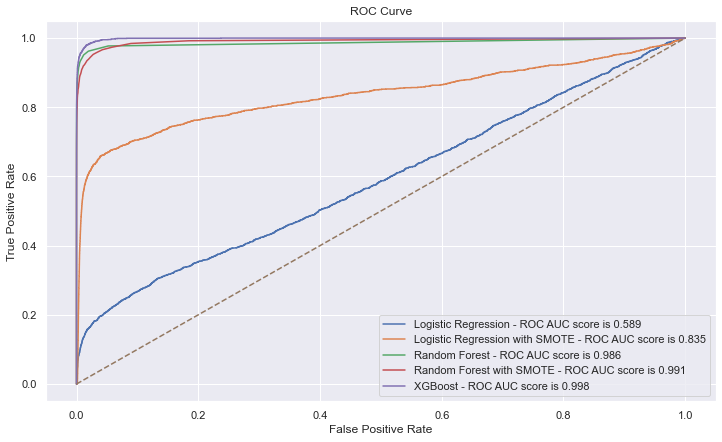

In [379]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 7))
fpr, tpr, _ = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_val, lr_smote.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_val, rf_smote.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_val, gbm.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression - ROC AUC score is 0.589', 
            'Logistic Regression with SMOTE - ROC AUC score is 0.835', 
            'Random Forest - ROC AUC score is 0.986', 
            'Random Forest with SMOTE - ROC AUC score is 0.991', 
            'XGBoost - ROC AUC score is 0.998'])
plt.savefig('ROC curve.png',  dpi=500)
print(f'ROC AUC score for Logistic Regression is {roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])}')
print(f'ROC AUC score for Logistic Regression with SMOTE is {roc_auc_score(y_val, lr_smote.predict_proba(X_val)[:,1])}')
print(f'ROC AUC score for Random Forest is {roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])}')
print(f'ROC AUC score for Random Forest with SMOTE is {roc_auc_score(y_val, rf_smote.predict_proba(X_val)[:,1])}')
print(f'ROC AUC score for XGBoost is {roc_auc_score(y_val, gbm.predict_proba(X_val)[:,1])}')

### XGBoost is selected as it outperforms other models

In [367]:
# Tuning the precision and recall
# default threshold 
y_predict = gbm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.9607,   Recall: 0.8098


XGBoost best F1 score 0.878 at prob decision threshold >= 0.462


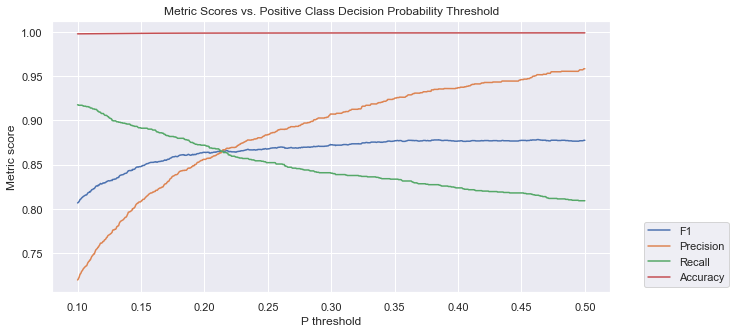

In [371]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = gbm.predict_proba(X_val)[:,1] 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.figure(figsize=[10,5])    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]


print('XGBoost best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

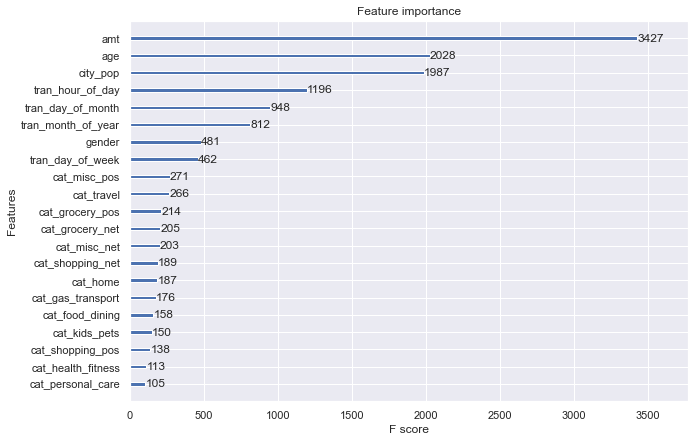

<Figure size 720x360 with 0 Axes>

In [402]:
plt.rcParams["figure.figsize"] = (10, 7);
plot_importance(gbm);
plt.figure(figsize=[10,5]);